In [1]:
 ! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tusharkhete","key":"6392623b3e9594fd218ec94debb77d43"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset       11KB  2024-09-28 20:21:12           7594        139  1.0              
lainguyn123/student-performance-factors                      Student Performance Factors                         94KB  2024-09-02 10:53:57          35979        636  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                        22KB  2024-10-06 11:27:38           3804         80  1.0              
mohamedyosef101/2024-olympics-medals-and-economic-status     2024 Olympics Medal

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:05<00:00, 307MB/s]
100% 1.06G/1.06G [00:05<00:00, 193MB/s]


In [21]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
Validation_ds = validation_ds.map(process)

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [23]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Create a directory to save the checkpoints
checkpoint_path = "model_checkpoints"
os.makedirs(checkpoint_path, exist_ok=True)

# Create checkpoint callback
checkpoint = ModelCheckpoint(
    filepath=os.path.join(checkpoint_path, 'model-{epoch:02d}-{val_accuracy:.2f}.keras'),
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Optional: Create early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

# List of callbacks
callbacks = [checkpoint, early_stopping]
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=validation_ds,
    callbacks=callbacks
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9863 - loss: 0.0436
Epoch 1: val_accuracy improved from -inf to 0.65000, saving model to model_checkpoints/model-01-0.65.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 88ms/step - accuracy: 0.9863 - loss: 0.0436 - val_accuracy: 0.6500 - val_loss: 143.5341
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9866 - loss: 0.0415
Epoch 2: val_accuracy improved from 0.65000 to 0.67480, saving model to model_checkpoints/model-02-0.67.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 86ms/step - accuracy: 0.9866 - loss: 0.0415 - val_accuracy: 0.6748 - val_loss: 129.5944
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9896 - loss: 0.0330
Epoch 3: val_accuracy did not improve from 0.67480
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.9896 - loss: 0.0330 - val_accuracy: 0.6620 - val_loss: 275.1276
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9887 - loss: 0.0391
Epoch 4: val_accuracy

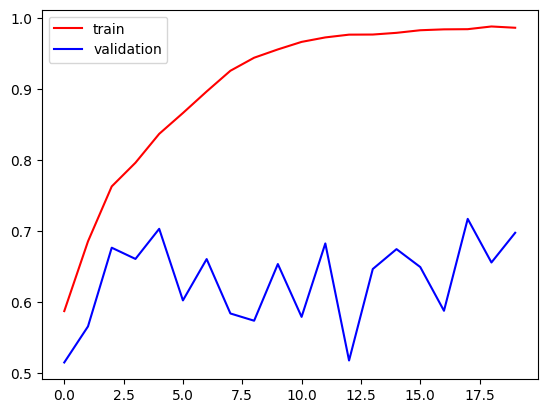

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="validation")
plt.legend()history = model.fit(
    train_ds,
    epochs=10,
    validation_data=validation_ds,
    callbacks=callbacks
)
plt.show()


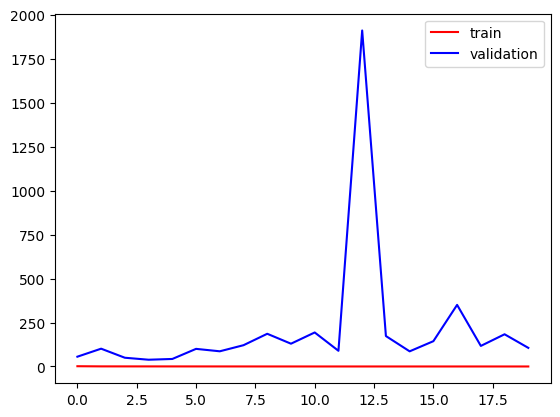

In [14]:
plt.plot(history.history["loss"], color="red", label="train")
plt.plot(history.history["val_loss"], color="blue", label="validation")
plt.legend()
plt.show()

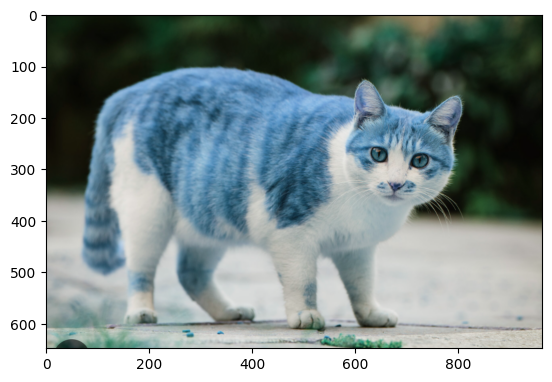

In [19]:
import cv2


test_img = cv2.imread("/content/sample_data/Screenshot 2024-10-19 at 11.31.40 PM.png")


plt.imshow(test_img)

In [20]:
test_img.shape

(2657, 1771, 3)

test_img = cv2.resize(test_img,(256,256))


test_input = test_img.reshape((1,256,256,3))


model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[1.]], dtype=float32)